In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import requests
import seaborn as sns
import random
from scipy.stats import norm
from scipy.optimize import minimize_scalar

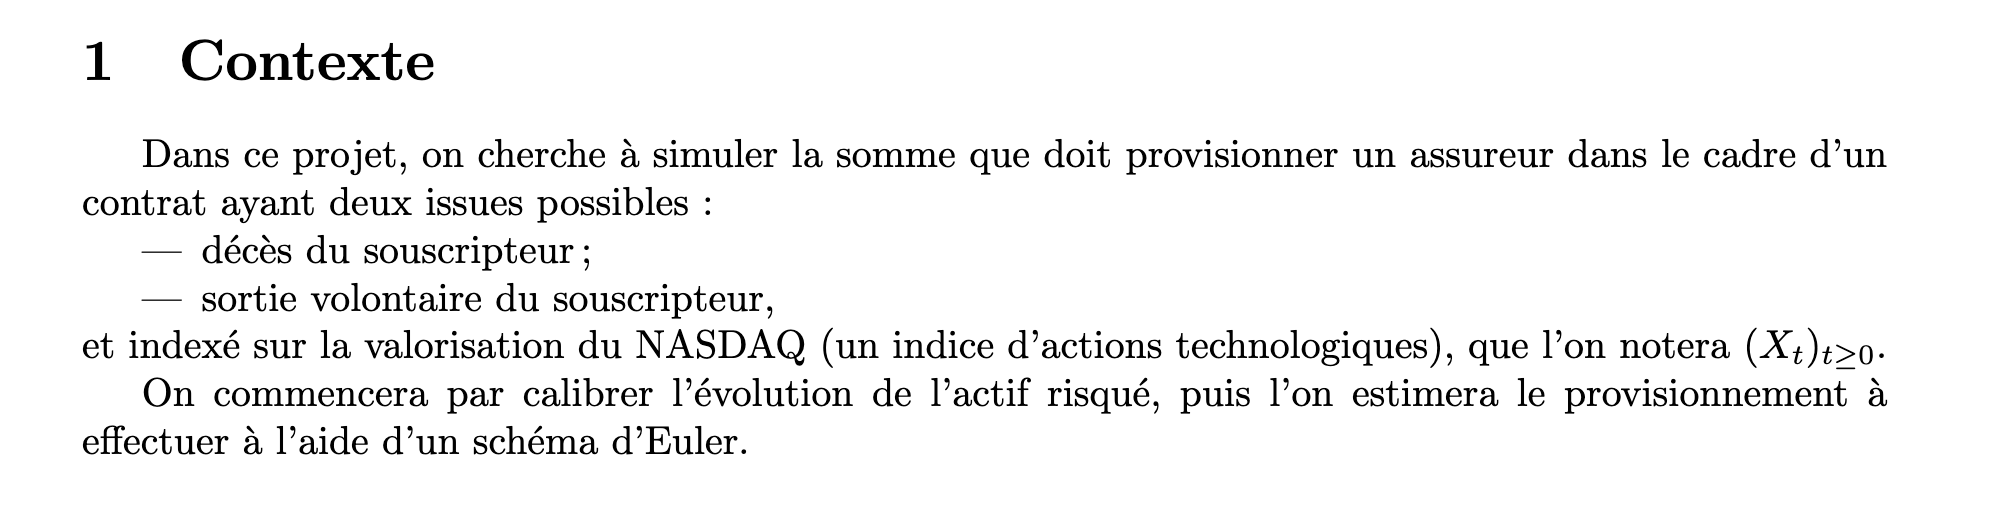

In [2]:
df_ixic = yf.download("^IXIC")
df_ixic.columns=["close","high","low","open","volume"]


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:

url = "https://api.nasdaq.com/api/quote/NDX/option-chain?assetclass=index&limit=1800&fromdate=2025-12-01&todate=2025-12-31"

payload = {}
headers = {
  'accept': 'application/json, text/plain, */*',
  'accept-language': 'en-US,en;q=0.7',
  'origin': 'https://www.nasdaq.com',
  'priority': 'u=1, i',
  'referer': 'https://www.nasdaq.com/',
  'sec-ch-ua': '"Brave";v="141", "Not?A_Brand";v="8", "Chromium";v="141"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"macOS"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site': 'same-site',
  'sec-gpc': '1',
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36'
}

response = requests.request("GET", url, headers=headers, data=payload).json()

In [4]:
df=pd.DataFrame(response["data"]["table"]["rows"])
df_ndx_put_option = df[df["expirygroup"]==""]
df_ndx_put_option

,expirygroup,expiryDate,c_Last,c_Change,c_Bid,c_Ask,c_Volume,c_Openinterest,c_colour,strike,p_Last,p_Change,p_Bid,p_Ask,p_Volume,p_Openinterest,p_colour,drillDownURL
1,,Dec 1,--,--,"2,330.50","2,690.80",--,--,True,"22,200.00",28.54,--,37.80,40.10,--,200,False,/market-activity/index/ndx/option-chain/call-p...
2,,Dec 1,--,--,"2,236.10","2,594.90",--,--,True,"22,300.00",--,--,41.40,44.10,--,--,False,/market-activity/index/ndx/option-chain/call-p...
3,,Dec 1,--,--,"2,138.40","2,497.90",--,--,True,"22,400.00",--,--,45.70,48.20,--,--,False,/market-activity/index/ndx/option-chain/call-p...
4,,Dec 1,--,--,"2,042.90","2,403.70",--,--,True,"22,500.00",--,--,50.50,53.10,--,--,False,/market-activity/index/ndx/option-chain/call-p...
5,,Dec 1,--,--,"1,949.20","2,309.30",--,--,True,"22,600.00",--,--,55.90,58.50,--,--,False,/market-activity/index/ndx/option-chain/call-p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,,Dec 31,169.69,--,165.20,173.70,--,5,False,"26,300.00",--,--,"1,623.00","1,798.00",--,--,True,/market-activity/index/ndx/option-chain/call-p...
1796,,Dec 31,164.55,--,159.80,168.00,--,3,False,"26,325.00",--,--,"1,636.90","1,817.50",--,--,True,/market-activity/index/ndx/option-chain/call-p...
1797,,Dec 31,156.94,--,154.80,163.20,--,1,False,"26,350.00",--,--,"1,656.60","1,840.30",--,--,True,/market-activity/index/ndx/option-chain/call-p...
1798,,Dec 31,253.00,--,149.70,158.10,--,4,False,"26,375.00",--,--,"1,576.60","1,958.20",--,--,True,/market-activity/index/ndx/option-chain/call-p...


In [5]:
# df_ndx_put_option.to_csv("../data/sujet6/ndx_put_option.csv",index=False)
# df_ixic.to_csv("../data/sujet6/ixic.csv")

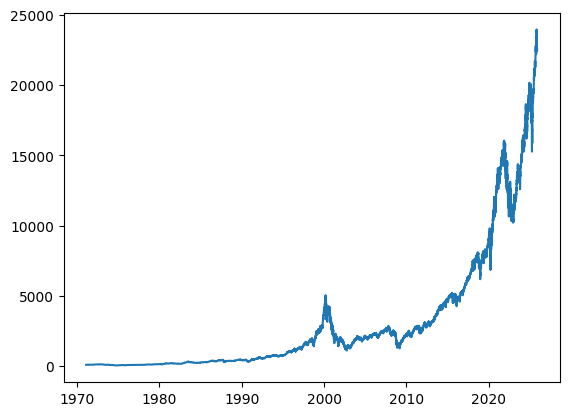

In [6]:
plt.plot(df_ixic["close"])

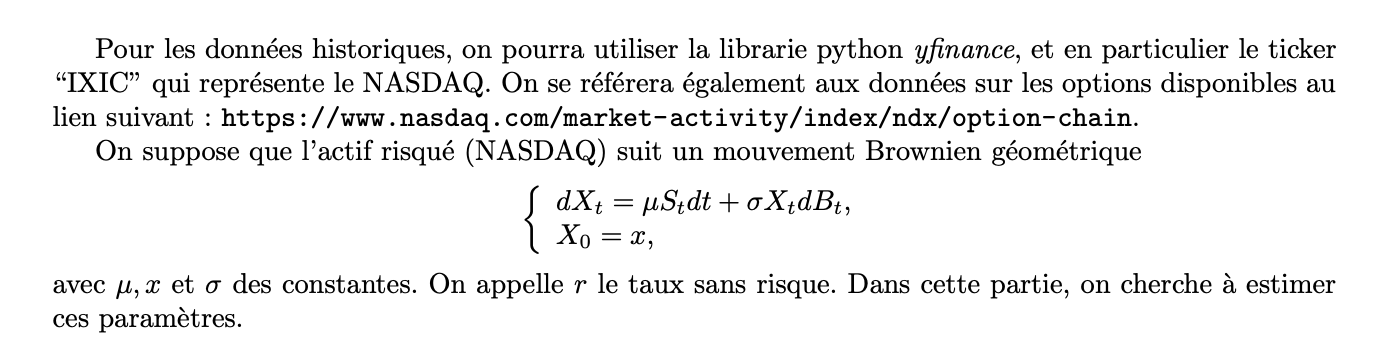

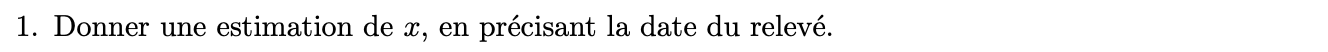

In [7]:
# spot và ngày chốt
spot_date = df_ixic.index[-1]
x = float(df_ixic["close"].iloc[-1])
spot_date, x


(Timestamp('2025-11-19 00:00:00'), 22564.23046875)

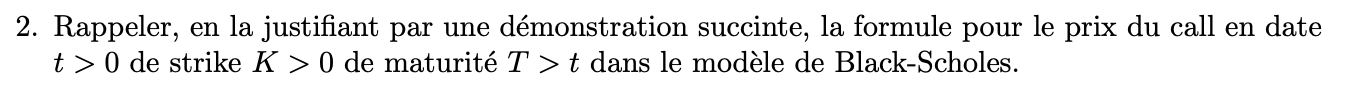

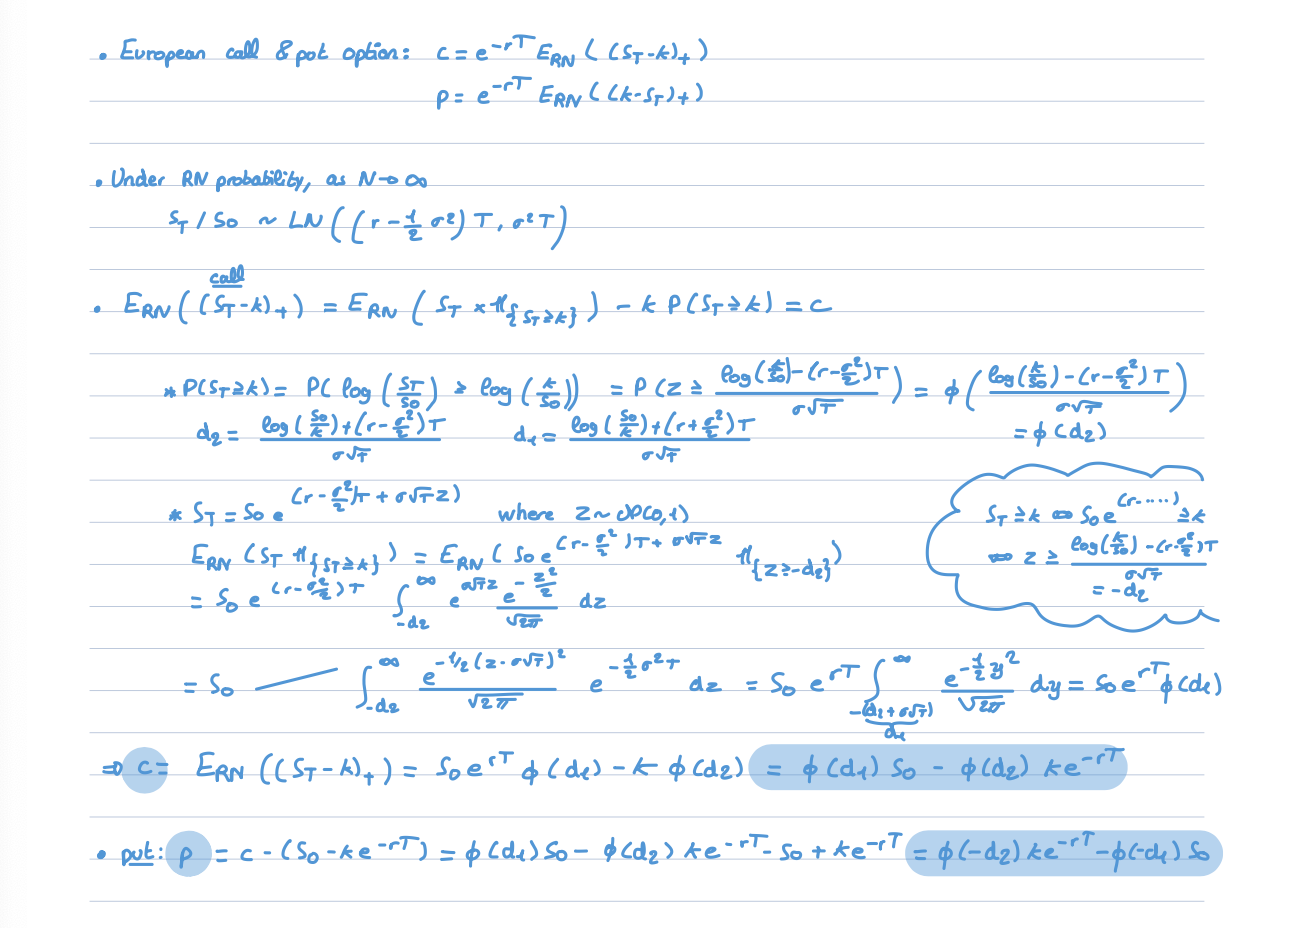

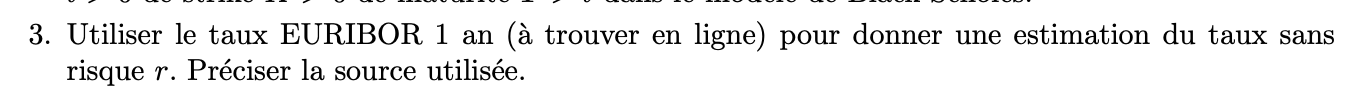

In [8]:
taux = pd.read_excel("../data/sujet6/QQQ euri2.0.xlsx",sheet_name="Euribor 12 M")
taux.tail()

,Date,PX_LAST,CHG_PCT_1D
250,2024-11-04,2.619,-0.380
251,2024-11-01,2.629,3.219
252,2024-10-31,2.547,-0.039
253,2024-10-30,2.548,-1.125
254,2024-10-29,2.577,-0.116


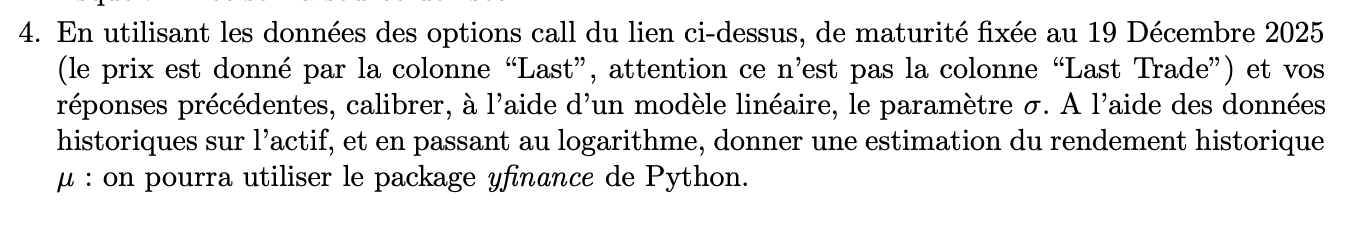

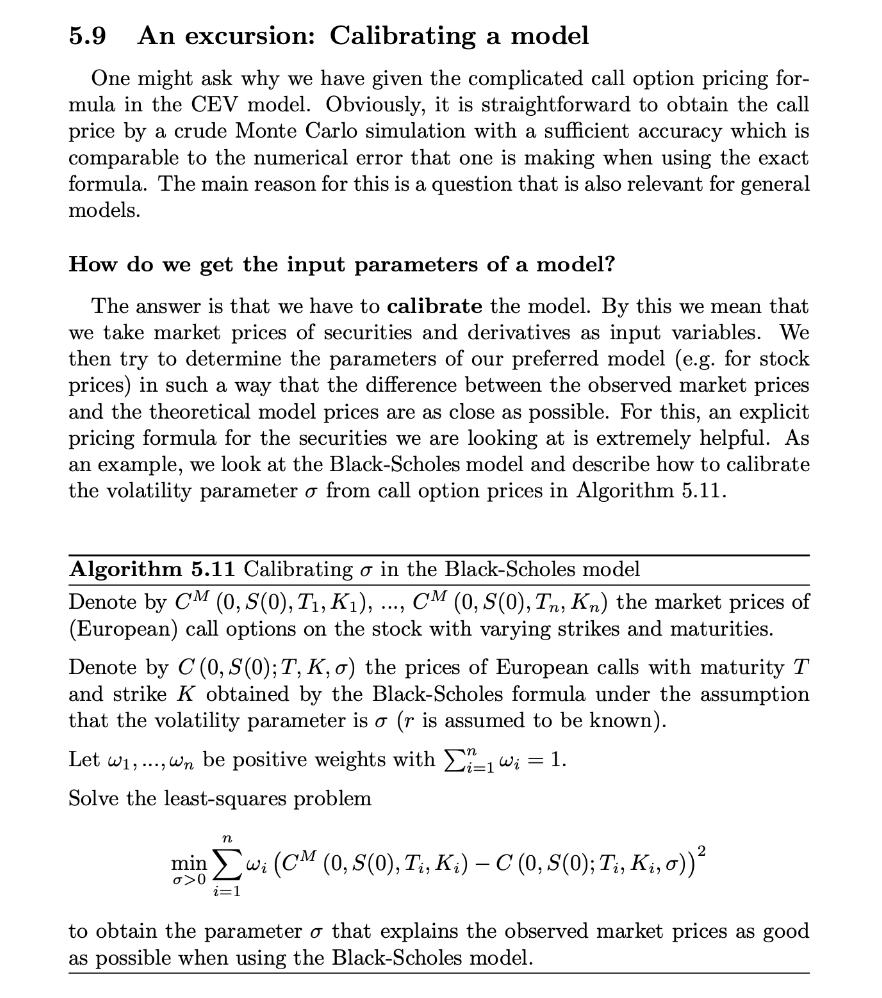

In [9]:
df_option = df_ndx_put_option[df_ndx_put_option["expiryDate"]=="Dec 19"]
filter_option = df_option[df_option["c_Last"]!="--"]
filter_option

,expirygroup,expiryDate,c_Last,c_Change,c_Bid,c_Ask,c_Volume,c_Openinterest,c_colour,strike,p_Last,p_Change,p_Bid,p_Ask,p_Volume,p_Openinterest,p_colour,drillDownURL
970,,Dec 19,"3,902.25",--,"2,431.70","2,917.60",--,17,True,"22,200.00",161.40,22.18,158.20,162.60,1,141,False,/market-activity/index/ndx/option-chain/call-p...
978,,Dec 19,"1,907.36",--,"2,408.20","2,827.50",--,38,True,"22,300.00",147.60,--,167.60,172.20,--,63,False,/market-activity/index/ndx/option-chain/call-p...
986,,Dec 19,"1,960.10",--,"2,252.00","2,738.00",--,15,True,"22,400.00",247.69,--,177.30,182.90,--,238,False,/market-activity/index/ndx/option-chain/call-p...
994,,Dec 19,"3,039.90",--,"2,230.00","2,479.60",--,406,True,"22,500.00",231.00,26.00,188.00,193.30,--,759,False,/market-activity/index/ndx/option-chain/call-p...
1002,,Dec 19,"3,015.01",--,"2,070.20","2,498.80",--,19,True,"22,600.00",215.10,81.15,199.50,205.40,1,138,False,/market-activity/index/ndx/option-chain/call-p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,,Dec 19,42.83,--,37.90,41.40,--,15,False,"26,900.00","2,043.90",--,"2,025.40","2,382.60",--,2,True,/market-activity/index/ndx/option-chain/call-p...
1336,,Dec 19,29.82,-11.87,31.80,35.20,13,1477,False,"27,000.00","2,131.40",--,"2,062.10","2,548.20",--,1,True,/market-activity/index/ndx/option-chain/call-p...
1337,,Dec 19,45.00,--,28.00,45.10,--,28,False,"27,000.00","2,308.15",--,"2,265.70","2,602.00",--,5,True,/market-activity/index/ndx/option-chain/call-p...
1341,,Dec 19,27.90,-4.10,26.70,30.00,1,11,False,"27,100.00",--,--,"2,213.60","2,573.90",--,--,True,/market-activity/index/ndx/option-chain/call-p...


In [10]:


# === INPUTS ===
S0 = df_ixic["close"].iloc[-1]
T = (np.datetime64("2025-12-19") - np.datetime64("today")) / np.timedelta64(1, "D")
T = T / 365
r = taux["PX_LAST"].iloc[-1]/100

# === YOUR OPTION DATA (strike, last) ===
strikes = filter_option["strike"].str.replace(",","").astype(float).values
market_prices = filter_option["c_Last"].str.replace(",","").astype(float).values

# === BLACK-SCHOLES CALL ===
def bs_call(S0, K, T, r, sigma):
    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

# === OBJECTIVE: sum of squared errors ===
def objective(sigma):
    model = np.array([bs_call(S0, K, T, r, sigma) for K in strikes])
    return np.sum((market_prices - model)**2)

# === OPTIMIZE σ ===
res = minimize_scalar(objective, bounds=(0.01, 2), method="bounded")
sigma_hat = res.x

print("Estimated sigma =", sigma_hat)


Estimated sigma = 0.6698724167255822


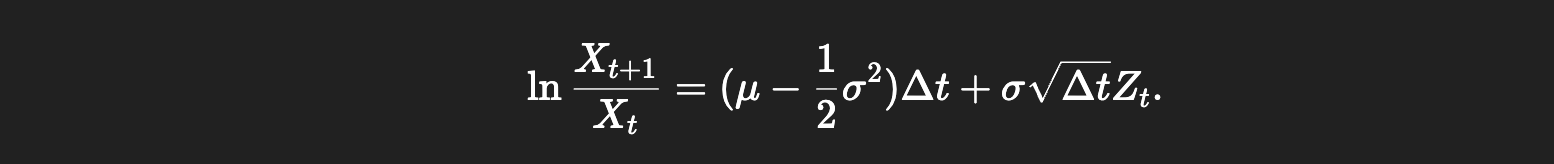

In [11]:

logret = np.log(df_ixic["close"] / df_ixic["close"].shift(1)).dropna()
dt = 1/252

mu_hat = logret.mean()/dt + 0.5 * sigma_hat**2
mu_hat

0.3232189980087883

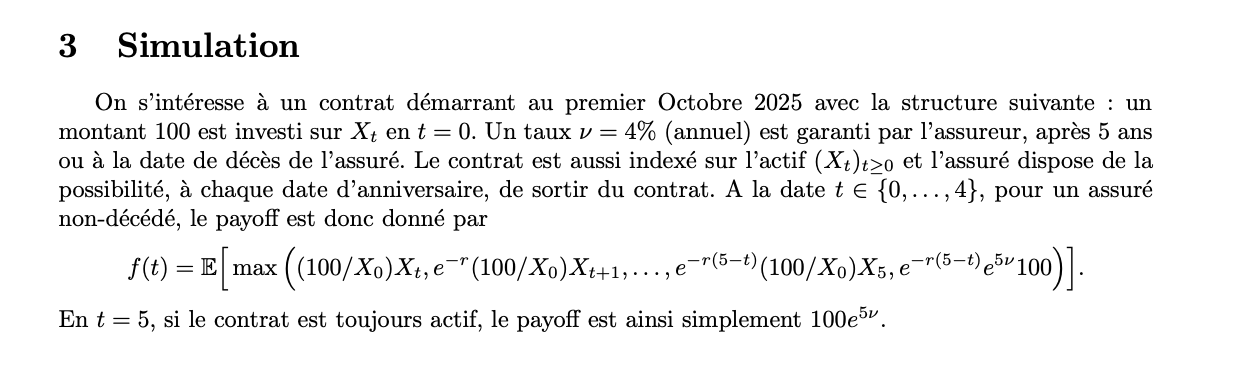

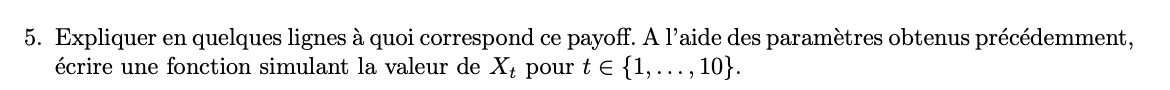

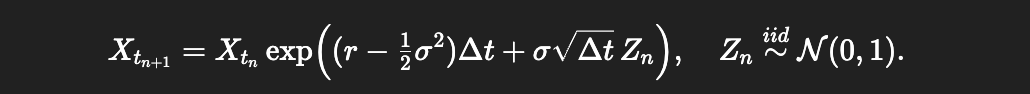

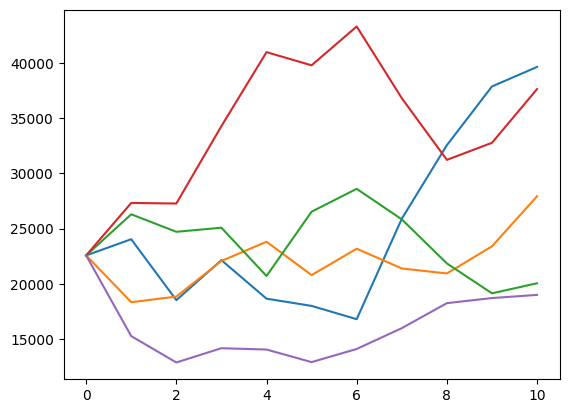

,path_1,path_2,path_3,path_4,path_5
t (years),,,,,
0,22564.230469,22564.230469,22564.230469,22564.230469,22564.230469
1,24032.079748,18322.235862,26293.192501,27321.194171,15246.102466
2,18508.774103,18830.101361,24706.441840,27271.023024,12855.681629
3,22135.932568,22063.319174,25076.624549,34287.499183,14149.093160
4,18641.748586,23804.104177,20698.198197,40998.970375,14029.048271
5,17987.222403,20781.051592,26528.727718,39802.280276,12887.687714
6,16779.788560,23172.788967,28602.744475,43325.373398,14079.723865
7,25887.835263,21381.833376,25834.644521,36823.006456,15967.447535
8,32559.803980,20928.371914,21840.766140,31228.992575,18235.153704


In [12]:

def simulate_X_annual(X0, r, sigma, T=10, n_paths=1, seed=None):
    rng = np.random.default_rng(seed)
    X = np.empty((T+1, n_paths), dtype=float)
    X[0, :] = X0
    drift = r - 0.5 * sigma**2
    for t in range(T):
        Z = rng.standard_normal(size=n_paths)
        X[t+1, :] = X[t, :] * np.exp(drift + sigma * Z)
    idx = pd.Index(range(T+1), name="t (years)")
    cols = [f"path_{i+1}" for i in range(n_paths)]
    return pd.DataFrame(X, index=idx, columns=cols)

X0 = float(df_ixic["close"].iloc[-1])
r  = 0.0219         
sigma = np.log(df_ixic["close"]/df_ixic["close"].shift(1)).std()*252**0.5   
paths = simulate_X_annual(X0, r, sigma, T=10, n_paths=5, seed=42)
plt.plot(paths.loc[0:1000])
plt.show()
paths

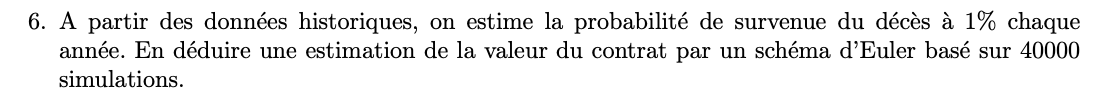

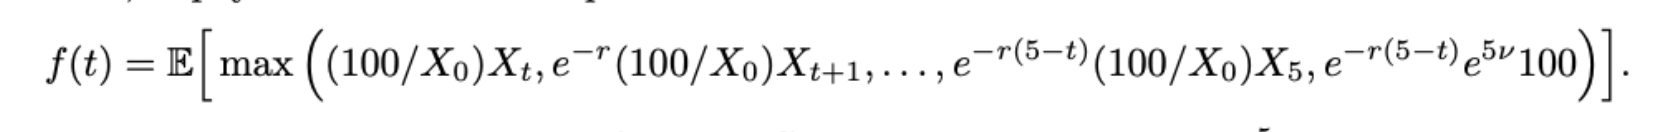

t<=5

In [13]:
def payoff_single_path(X, tau, r, nu):
    """
    X : array-like length 6: X[0]..X[5]
    tau : int in {0..6}
    r : risk-free rate
    nu : guaranteed growth rate
    """

    guarantee = np.exp(-r*5) * 100 * np.exp(5*nu)
    withdraws = [np.exp(-r*k) * (100/X[0]) * X[k] for k in range(tau,6)]

    return max(max(withdraws), guarantee)

(array([  402.,     0.,   366.,     0.,     0.,   426.,     0.,   409.,
            0., 38397.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

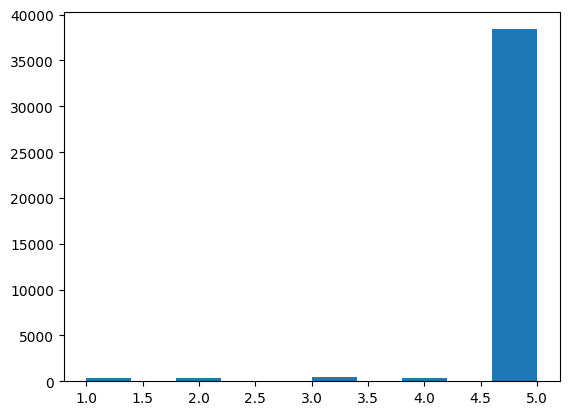

In [14]:
paths = simulate_X_annual(X0, r, sigma, T=5, n_paths=40000, seed=42)
scenario = paths.T.values
p = 0.01
G = np.clip(np.random.geometric(p, size=40000),0,5)
plt.hist(G)

<Axes: ylabel='Density'>

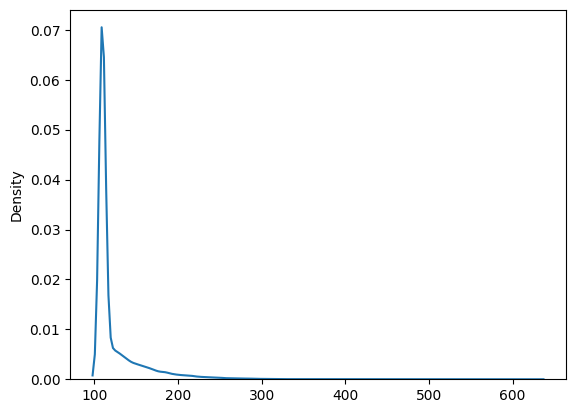

In [15]:
vega=0.04
res =[]
for i in range(len(G)):
    res.append(payoff_single_path(scenario[i], G[i], r, vega))
sns.kdeplot(res)

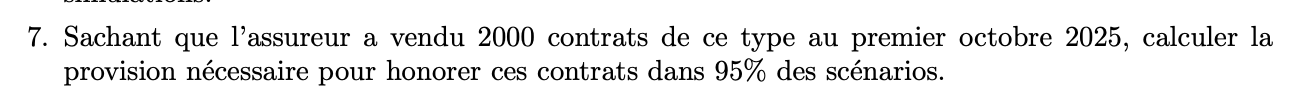

<Axes: ylabel='Density'>

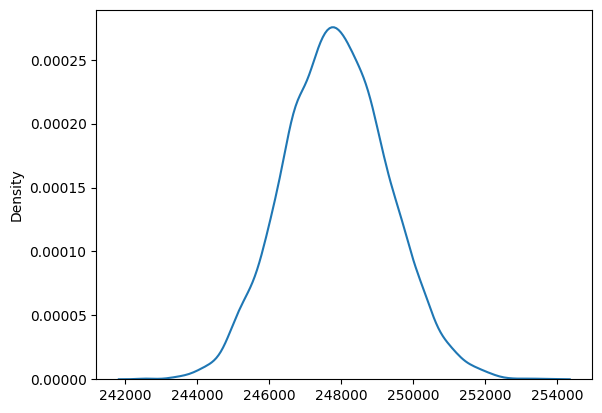

In [16]:
payoff_for_2000 = np.random.choice(res,size=(10000,2000))
total_payoff = np.sum(payoff_for_2000,axis=1)
sns.kdeplot(total_payoff)

In [17]:
np.quantile(total_payoff,0.95)

250263.67511547447

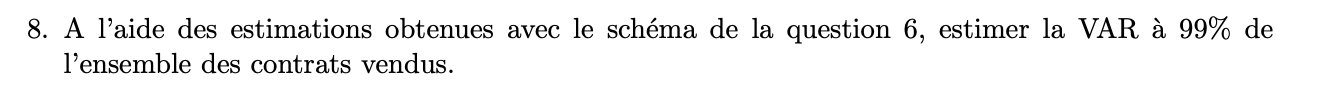

In [18]:
np.quantile(total_payoff,0.99)

251287.22086072335

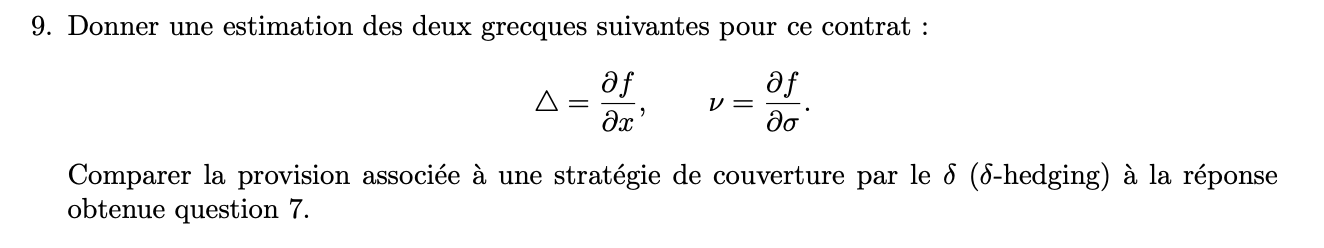